In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
# Imports
from backtest_utils import TradingSimulator
import pickle

In [48]:
strategy_name = 'dumb_strategy'
TS = TradingSimulator(strategy_name)

NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


In [49]:
# Dump New symbols into the stock_symbols.pkl
stock_symbols_pickle = 'stock_symbols.pkl'  # Name of the pickle file
symbols = []  # Example list of stock symbols
if len(symbols) > 0:
    TS.SAU.add_stock_symbols_to_pickle(symbols, stock_symbols_pickle)

In [50]:
# Load the data from 'stock_symbols.pkl' into a variable called 'symbols'
with open(stock_symbols_pickle, 'rb') as file:
    symbols = pickle.load(file)

In [51]:
stock_symbols_pickle = 'stock_symbols.pkl'  # Name of the pickle file
TS.SAU.update_stock_data(pickle_file=stock_symbols_pickle)

Updating data for LIFW...


[*********************100%%**********************]  1 of 1 completed

Data for LIFW updated in data\LIFW.csv.
Updating data for SRL...


[*********************100%%**********************]  1 of 1 completed


KeyboardInterrupt: 

In [52]:
# Imports
from datetime import datetime

# Optional Imports
import numpy as np
import matplotlib.pyplot as plt

In [53]:
symbols = ['HDB', 'BIIB', 'BNTX', 'MRNA', 'CHTR', 'AWK', 'SNAP', 'TFC', 'ES', 'KDP', 'HSY', 'NEE', 'TTWO', 'EL', 'JD', 'BA', 'EQNR', 'HUM', 'NTR', 'WPM', 'WPM', 'WBA', 'SBAC', 'MMM', 'BTI', 'ILMN', 'WDS', 'ADM', 'PFE', 'ALNY', 'FNV', 'NEM', 'WBD']


In [86]:
from backtest_utils import TradingSimulator
TS = TradingSimulator(strategy_name)
start_date = '2018-01-01'
end_date = '2020-12-31'
start_date_dt = datetime.strptime(start_date, "%Y-%m-%d")
end_date_dt = datetime.strptime(end_date, "%Y-%m-%d")
rebalance_frequency = 15  # In days
# create a numpy array of numbers 15 days apart from 0 to 365
long_count = 10
short_count = 5
portfolio_starting_value = 110000
risk_pct = 0.1
reinvest_profits_bool = False

# Run the backtest
test_no_leverage = TS.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=1.0)
test_w_leverage = TS.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=5.0)



NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


Running backtest: 2020-12-16 - 2020-12-30: 100%|██████████████████████| 73/73 [00:02<00:00, 30.79it/s, Profit=-3276.89]


Backtest results saved to backtests/BaseStrategy_2018-01-01_2020-12-31_15_10_5_110000_0.1_False_1.0.pkl


Running backtest: 2020-12-16 - 2020-12-30: 100%|██████████████████████| 73/73 [00:02<00:00, 30.59it/s, Profit=-1.34e+4]


Backtest results saved to backtests/BaseStrategy_2018-01-01_2020-12-31_15_10_5_110000_0.1_False_5.0.pkl


In [87]:
from analysis_utils import BacktestAnalyzer, compare_two_backtests

In [88]:
no_leverage_analysis = BacktestAnalyzer(test_no_leverage)
leveraged_analysis = BacktestAnalyzer(test_w_leverage)

total_comparison, long_comparison, short_comparison = compare_two_backtests(no_leverage_analysis, leveraged_analysis)
print(total_comparison)
print(long_comparison)
print(short_comparison)

backtests/BaseStrategy_2018-01-01_2020-12-31_15_10_5_110000_0.1_False_1.0_analysis.pkl
Backtest analysis saved to backtests/BaseStrategy_2018-01-01_2020-12-31_15_10_5_110000_0.1_False_1.0_analysis.pkl
backtests/BaseStrategy_2018-01-01_2020-12-31_15_10_5_110000_0.1_False_5.0_analysis.pkl
Backtest analysis saved to backtests/BaseStrategy_2018-01-01_2020-12-31_15_10_5_110000_0.1_False_5.0_analysis.pkl
lst                                  total               
test                                   1.0            5.0
cagr                                   NaN       0.067143
max_drawdown                  86093.584837  599520.873383
sharpe_ratio                     -0.309434      -0.476794
sortino_ratio                    -0.586476      -0.763041
profit_to_drawdown_ratio         -0.766218      -0.903914
beta                              0.247124       0.859937
alpha                         -1152.532784   -8289.550758
total_return                 -65966.469835 -541915.129869
positive_returns  

C:\Users\joses\Documents\GitHub\mathematricks\analysis_utils.py:80: RuntimeWarning: invalid value encountered in scalar power
  # Calculate the Profit to Drawdown Ratio
C:\Users\joses\Documents\GitHub\mathematricks\analysis_utils.py:127: RuntimeWarning: invalid value encountered in scalar power
  long_average_loss = np.mean([x for x in long_profits if x < 0])


In [89]:
benchmark_returns = TS.get_benchmark_returns(start_date_dt, end_date_dt, test_no_leverage['rebalance_periods'], portfolio_starting_value, benchmark_name='^IXIC')

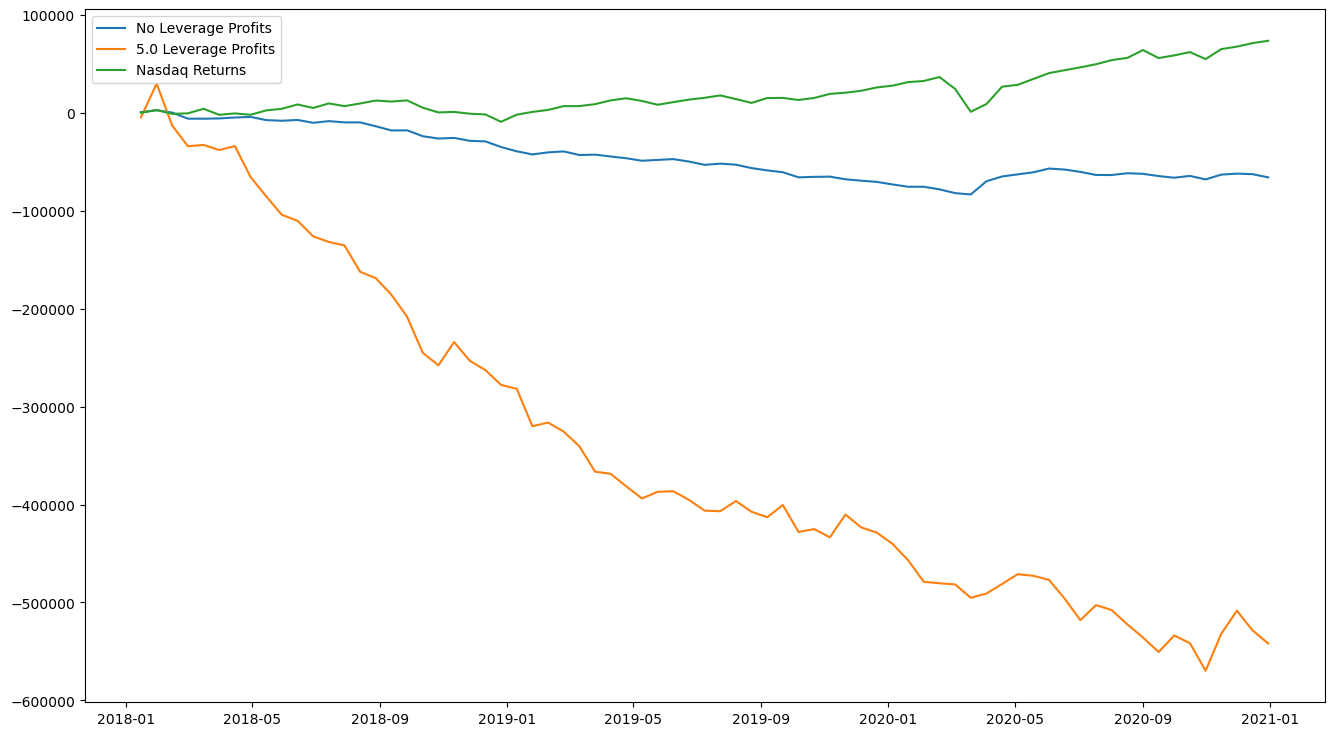

In [90]:
# Plot the backtest profits and the benchmark_data
plt.figure(figsize=(16, 9))
plt.plot(np.array(test_no_leverage['rebalance_periods'])[:, 1], np.cumsum(test_no_leverage['backtest_profits']), label='No Leverage Profits')
plt.plot(np.array(test_w_leverage['rebalance_periods'])[:, 1], np.cumsum(test_w_leverage['backtest_profits']), label='5.0 Leverage Profits')

plt.plot(np.array(test_no_leverage['rebalance_periods'])[:, 1], np.cumsum(benchmark_returns), label='Nasdaq Returns')
# Show labels
plt.legend()
# Show the plot
plt.show()